# 

# 

# Glass Identification

### Project Objective:

The project's core objective is to create a model that can accurately classify different types of glass based on their chemical properties. This dataset, originating from 1987 and credited to Vina Spiehler, is essential for forensic purposes, particularly in criminal investigations where identifying the type of glass found at a crime scene can be crucial evidence. By developing a robust classification model, the project aims to enhance the accuracy and efficiency of identifying glass types, contributing to forensic science and law enforcement efforts.

The chemical compositions are measured as the weight percent in corresponding oxide (unit measurement: weight percent in corresponding oxide, as are attributes 4-10).

* The columns are as follows:
* RI: refractive index
* Na: Sodium 
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
* Type of glass: (class attribute)

Type of glass

* 1- building_windows_float_processed
* 2- building_windows_non_float_processed
* 3- vehicle_windows_float_processed
* 4- vehicle_windows_non_float_processed (none in this database)
* 5- containers
* 6- tableware
* 7- headlamps

# 

# 

## Import Packages

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

# 

## Importing Dataset

In [2]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 

## EDA

In [3]:
df.shape

(214, 10)

In [4]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(213, 10)

### Checking Unique values

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: RI
Unique Values: [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 

In [7]:
df.isna().sum().sum()

0

### 

### 

## Data Distribution

In [8]:
x = df.drop(columns = ['Type'])
y = df['Type']

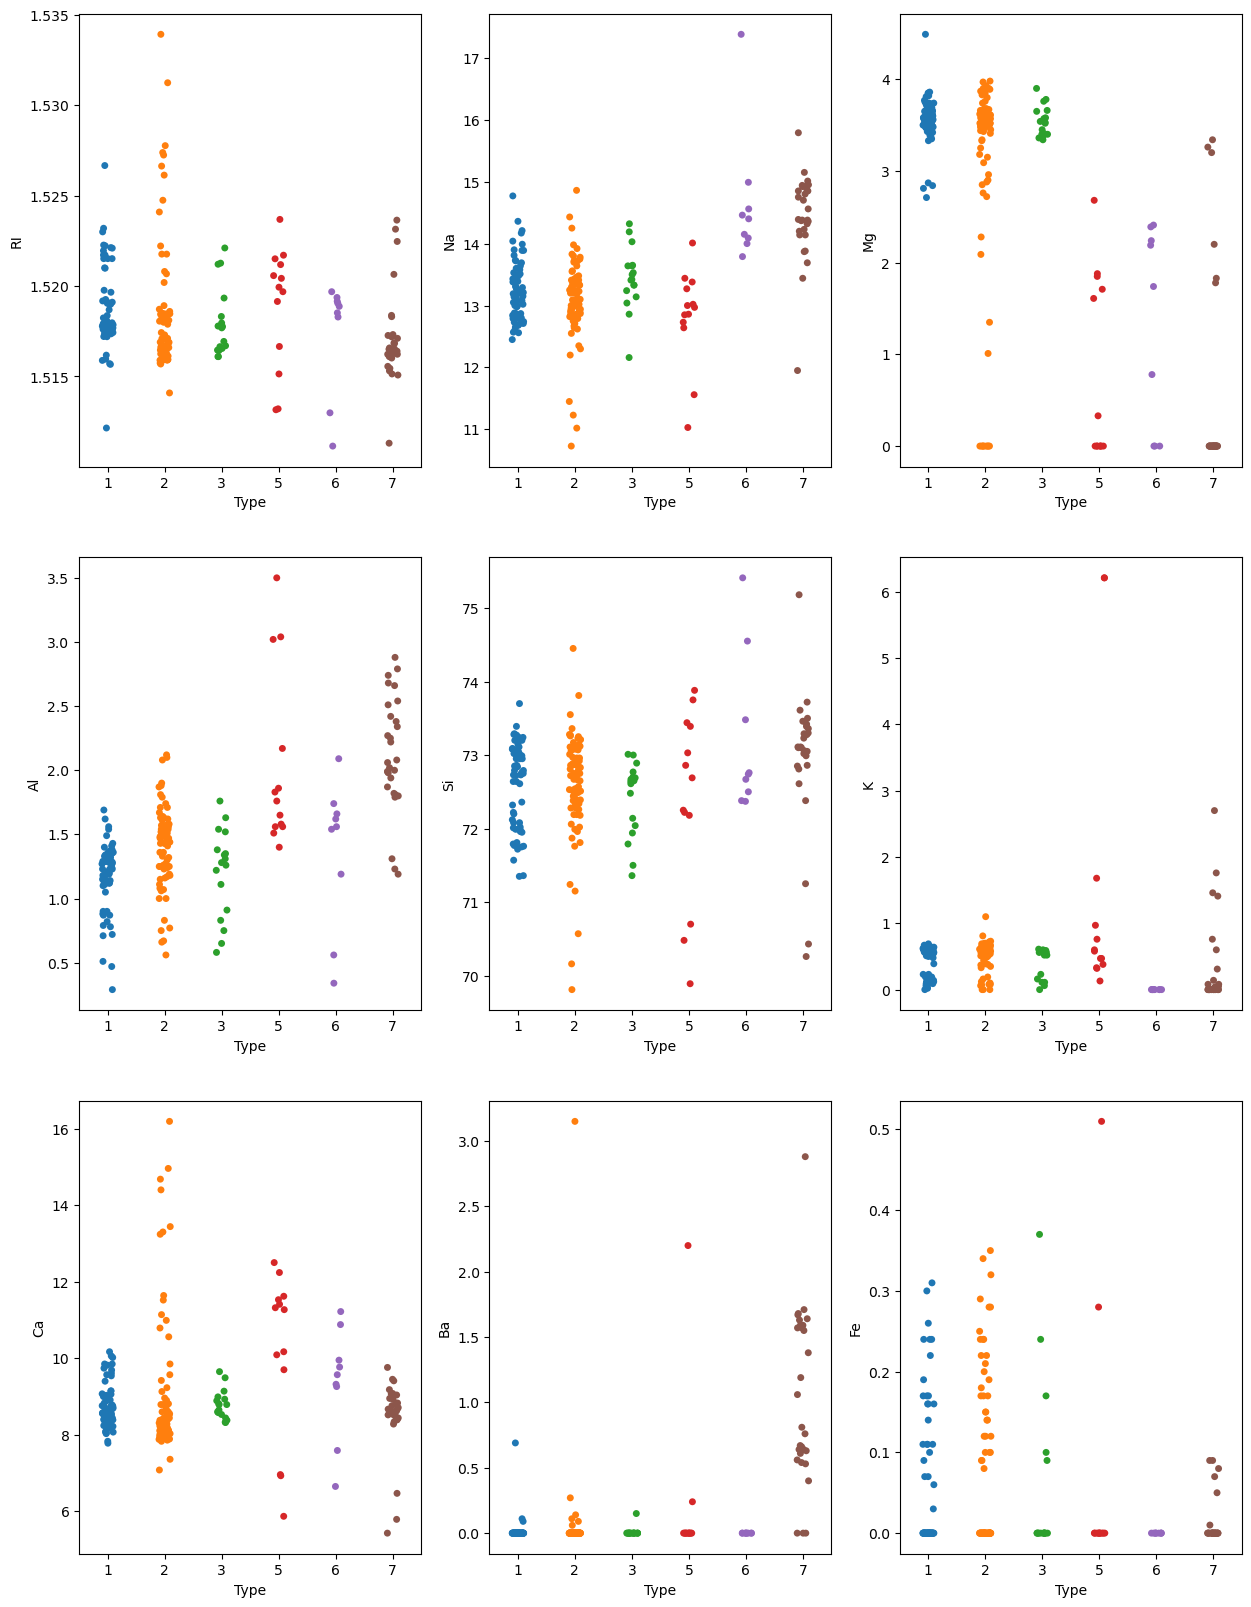

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot (3,3,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

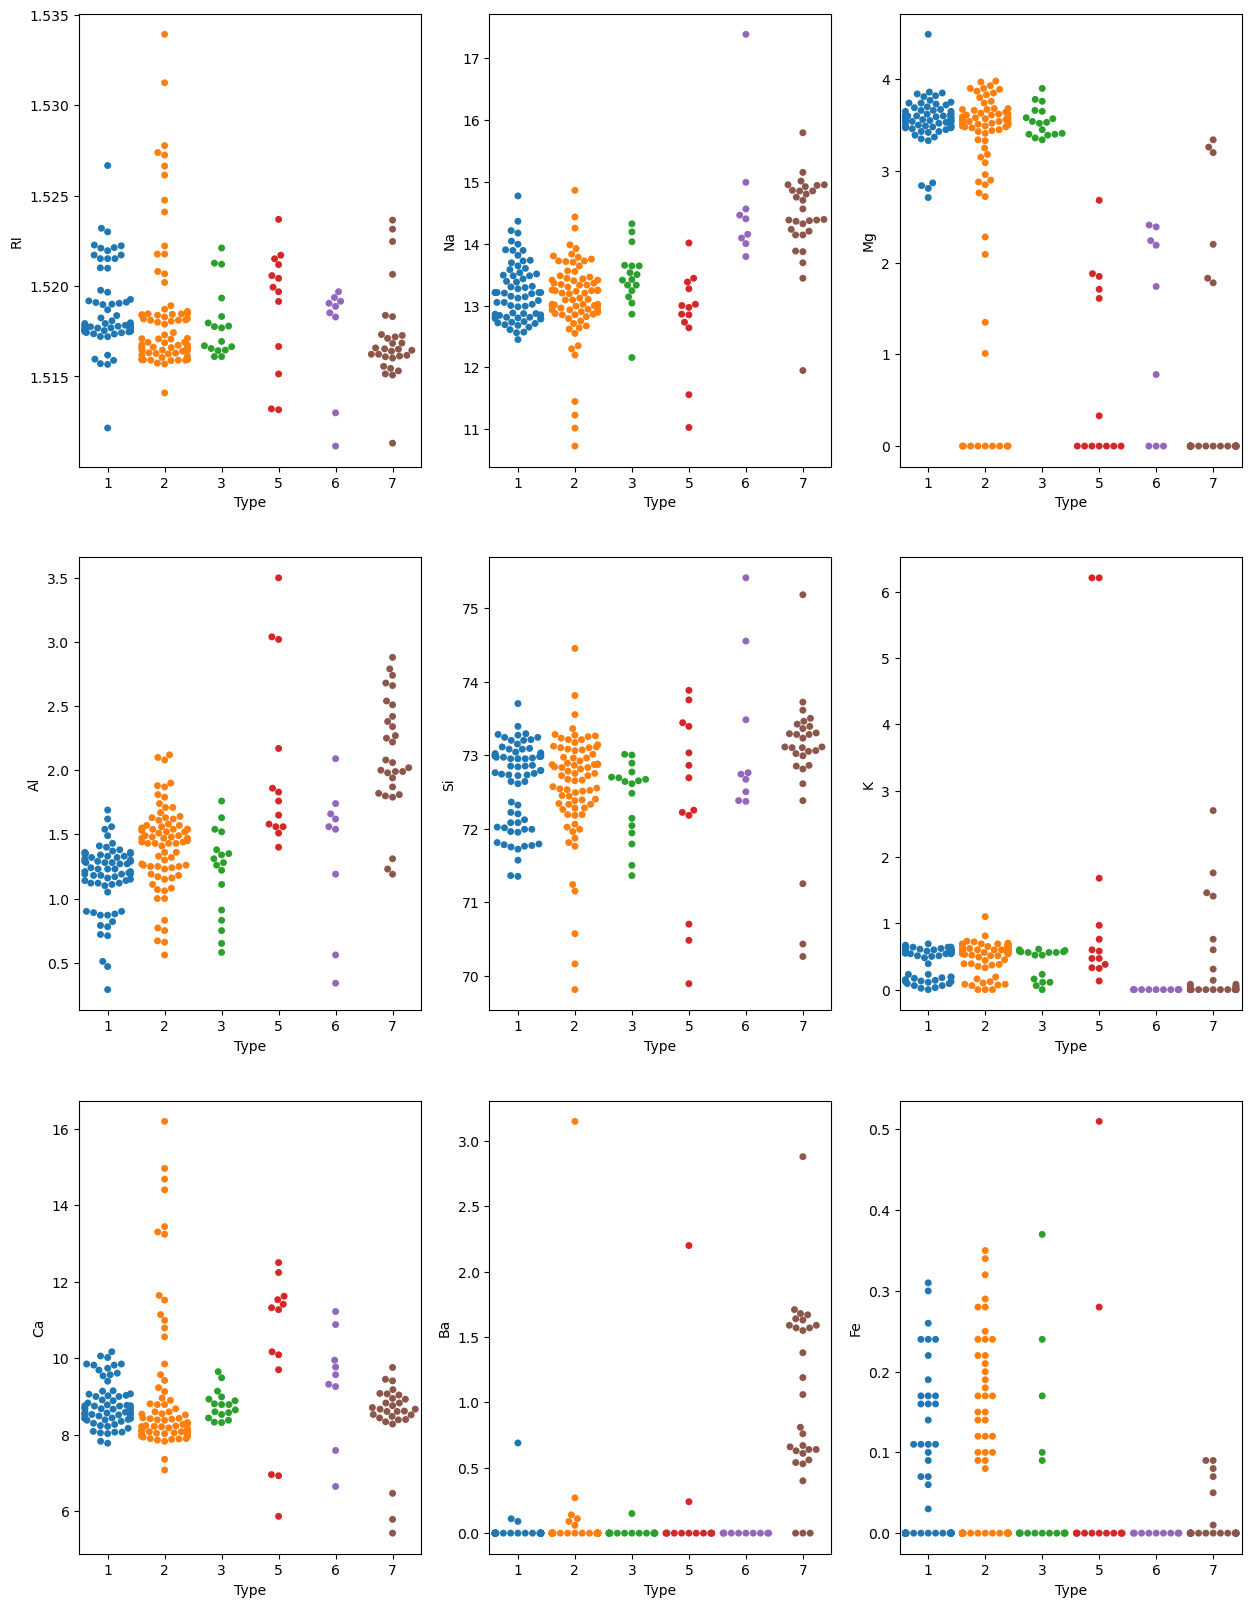

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.swarmplot(y,x[column])

    plotnumber+=1
plt.show()

# 

# 

## Feature Selection

In [11]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [12]:
df.shape

(213, 10)

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

In [14]:
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(x,y)

In [15]:
feature_scores = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(fit.scores_)], axis= 1) 
feature_scores.columns = ["Feature", "Score"]
feature_scores.sort_values (by="Score", ascending=False)

,Feature,Score
7,Ba,144.659991
2,Mg,100.728772
5,K,31.485097
3,Al,16.602047
1,Na,4.335113
6,Ca,3.237442
8,Fe,2.160581
4,Si,0.109779
0,RI,0.000047


# 

# 

## Checking Multi-colinearity

In [16]:
corr = df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [17]:
vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Scores"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif

,VIF Scores,variables
0,723057.269837,RI
1,13870.541985,Na
2,792.079451,Mg
3,175.032133,Al
4,365399.601887,Si
5,56.994832,K
6,8010.515875,Ca
7,27.452052,Ba
8,1.598053,Fe


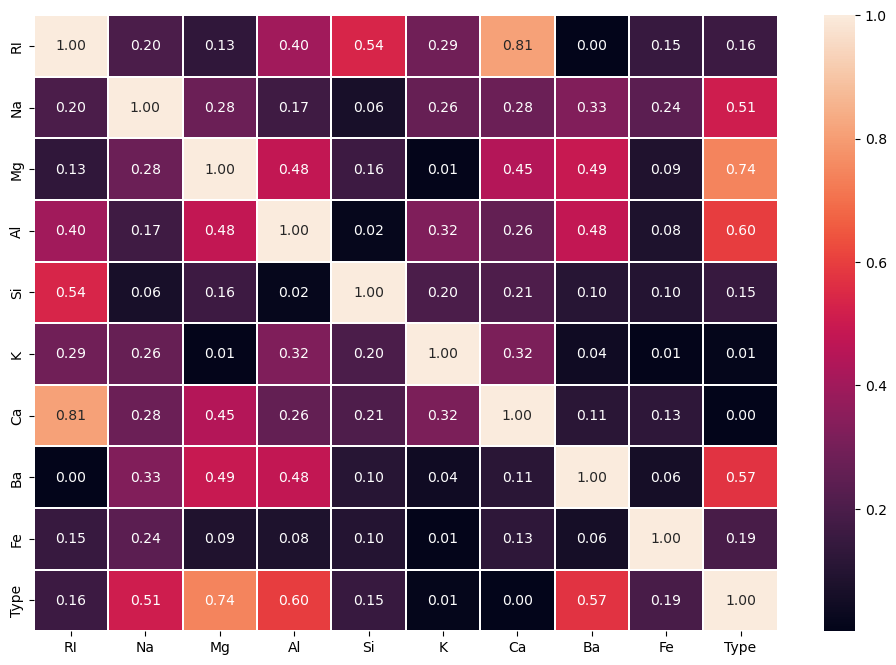

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

dt_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(dt_corr, annot=True, annot_kws={'size' :10}, linewidths=0.1,linecolor="white", fmt="0.2f")
plt.show()

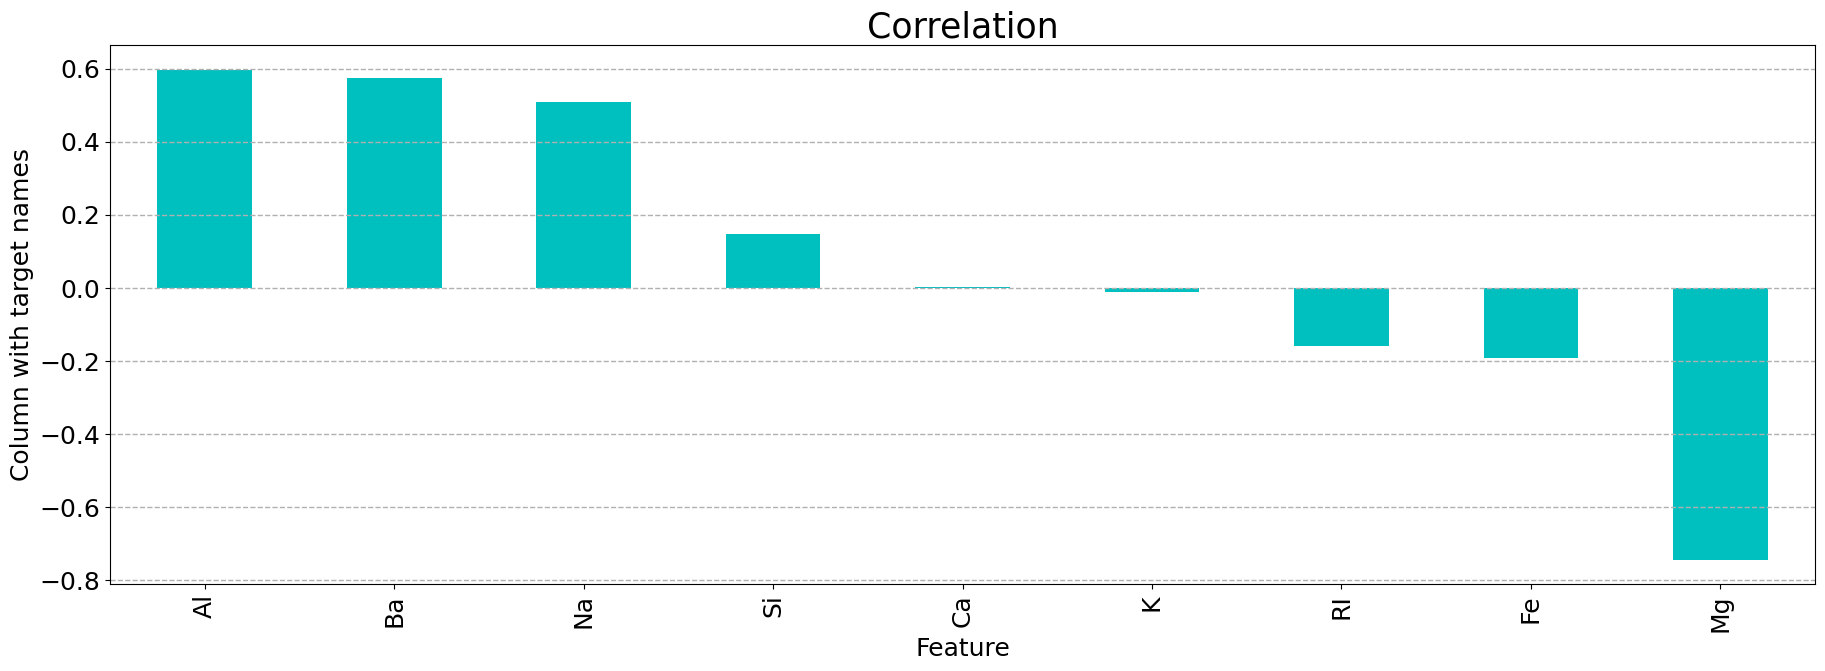

In [19]:
plt.figure(figsize=(22,7))
df.corr()['Type'].sort_values (ascending=False).drop(['Type']). plot (kind='bar', color='c', fontsize=18)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Column with target names', fontsize=18)
plt.title('Correlation', fontsize=25)

plt.grid(axis='y', linestyle='--', alpha=1, linewidth=1, which='both')

plt.show()

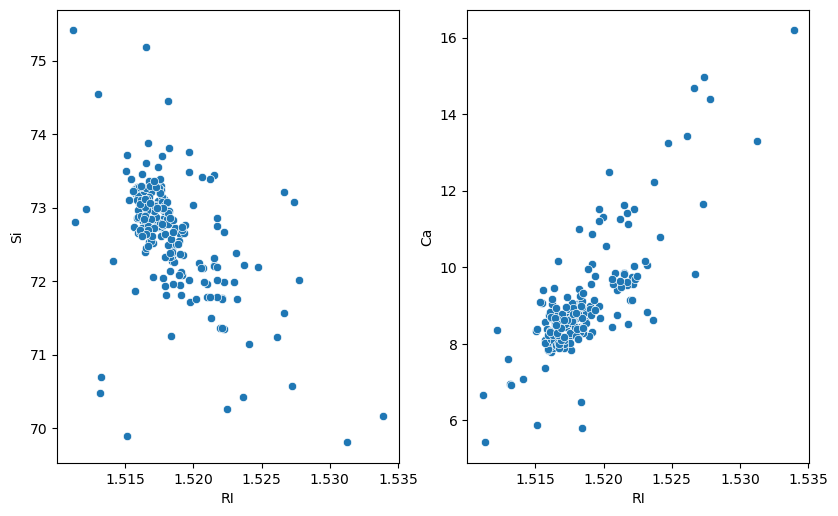

In [20]:
Y=df[['Si', 'Ca']].copy()

plt.figure(figsize=(15,20))
plotnumber = 1

for column in Y:
    if plotnumber<=2:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = 'RI', y = Y[column], data = df)

    plotnumber+=1
plt.show()

### Dropping Column

##### Dropping the column 'RI' as it has High Multicolinearity & Low Contribution Score

In [21]:
df= df.drop(columns = ['RI'])
df.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 

# 

## Removing Outliners

In [22]:
x = df.drop(columns = ['Type'])
y = df['Type']

In [23]:
df.describe()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


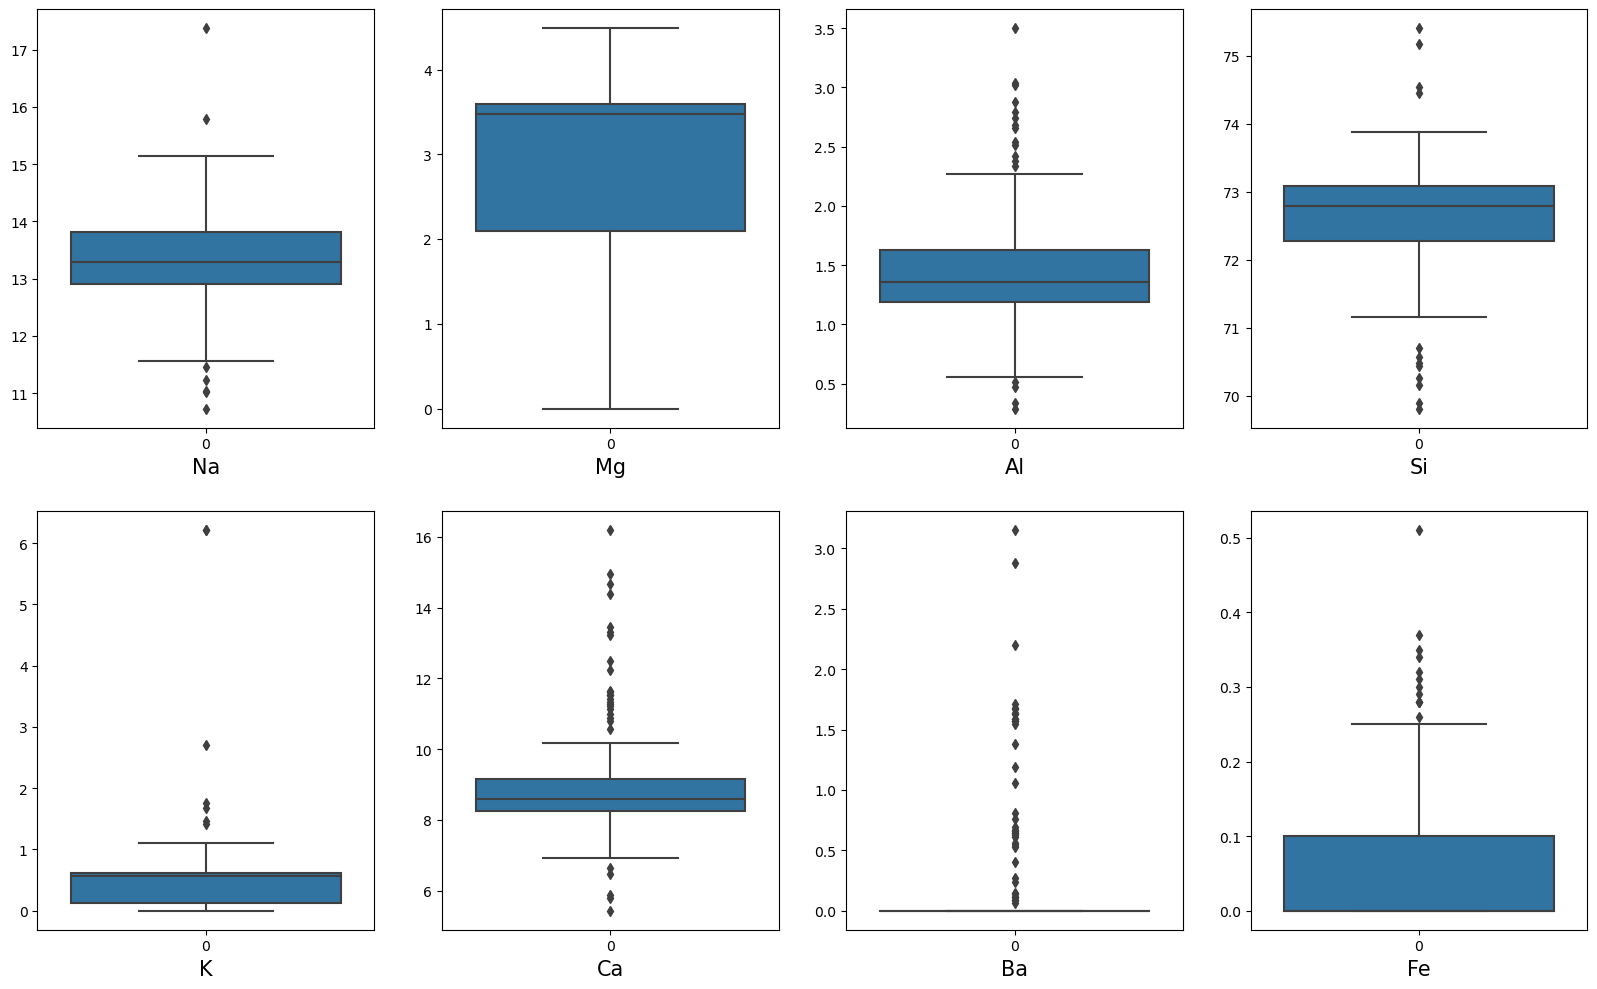

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in x: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= x[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

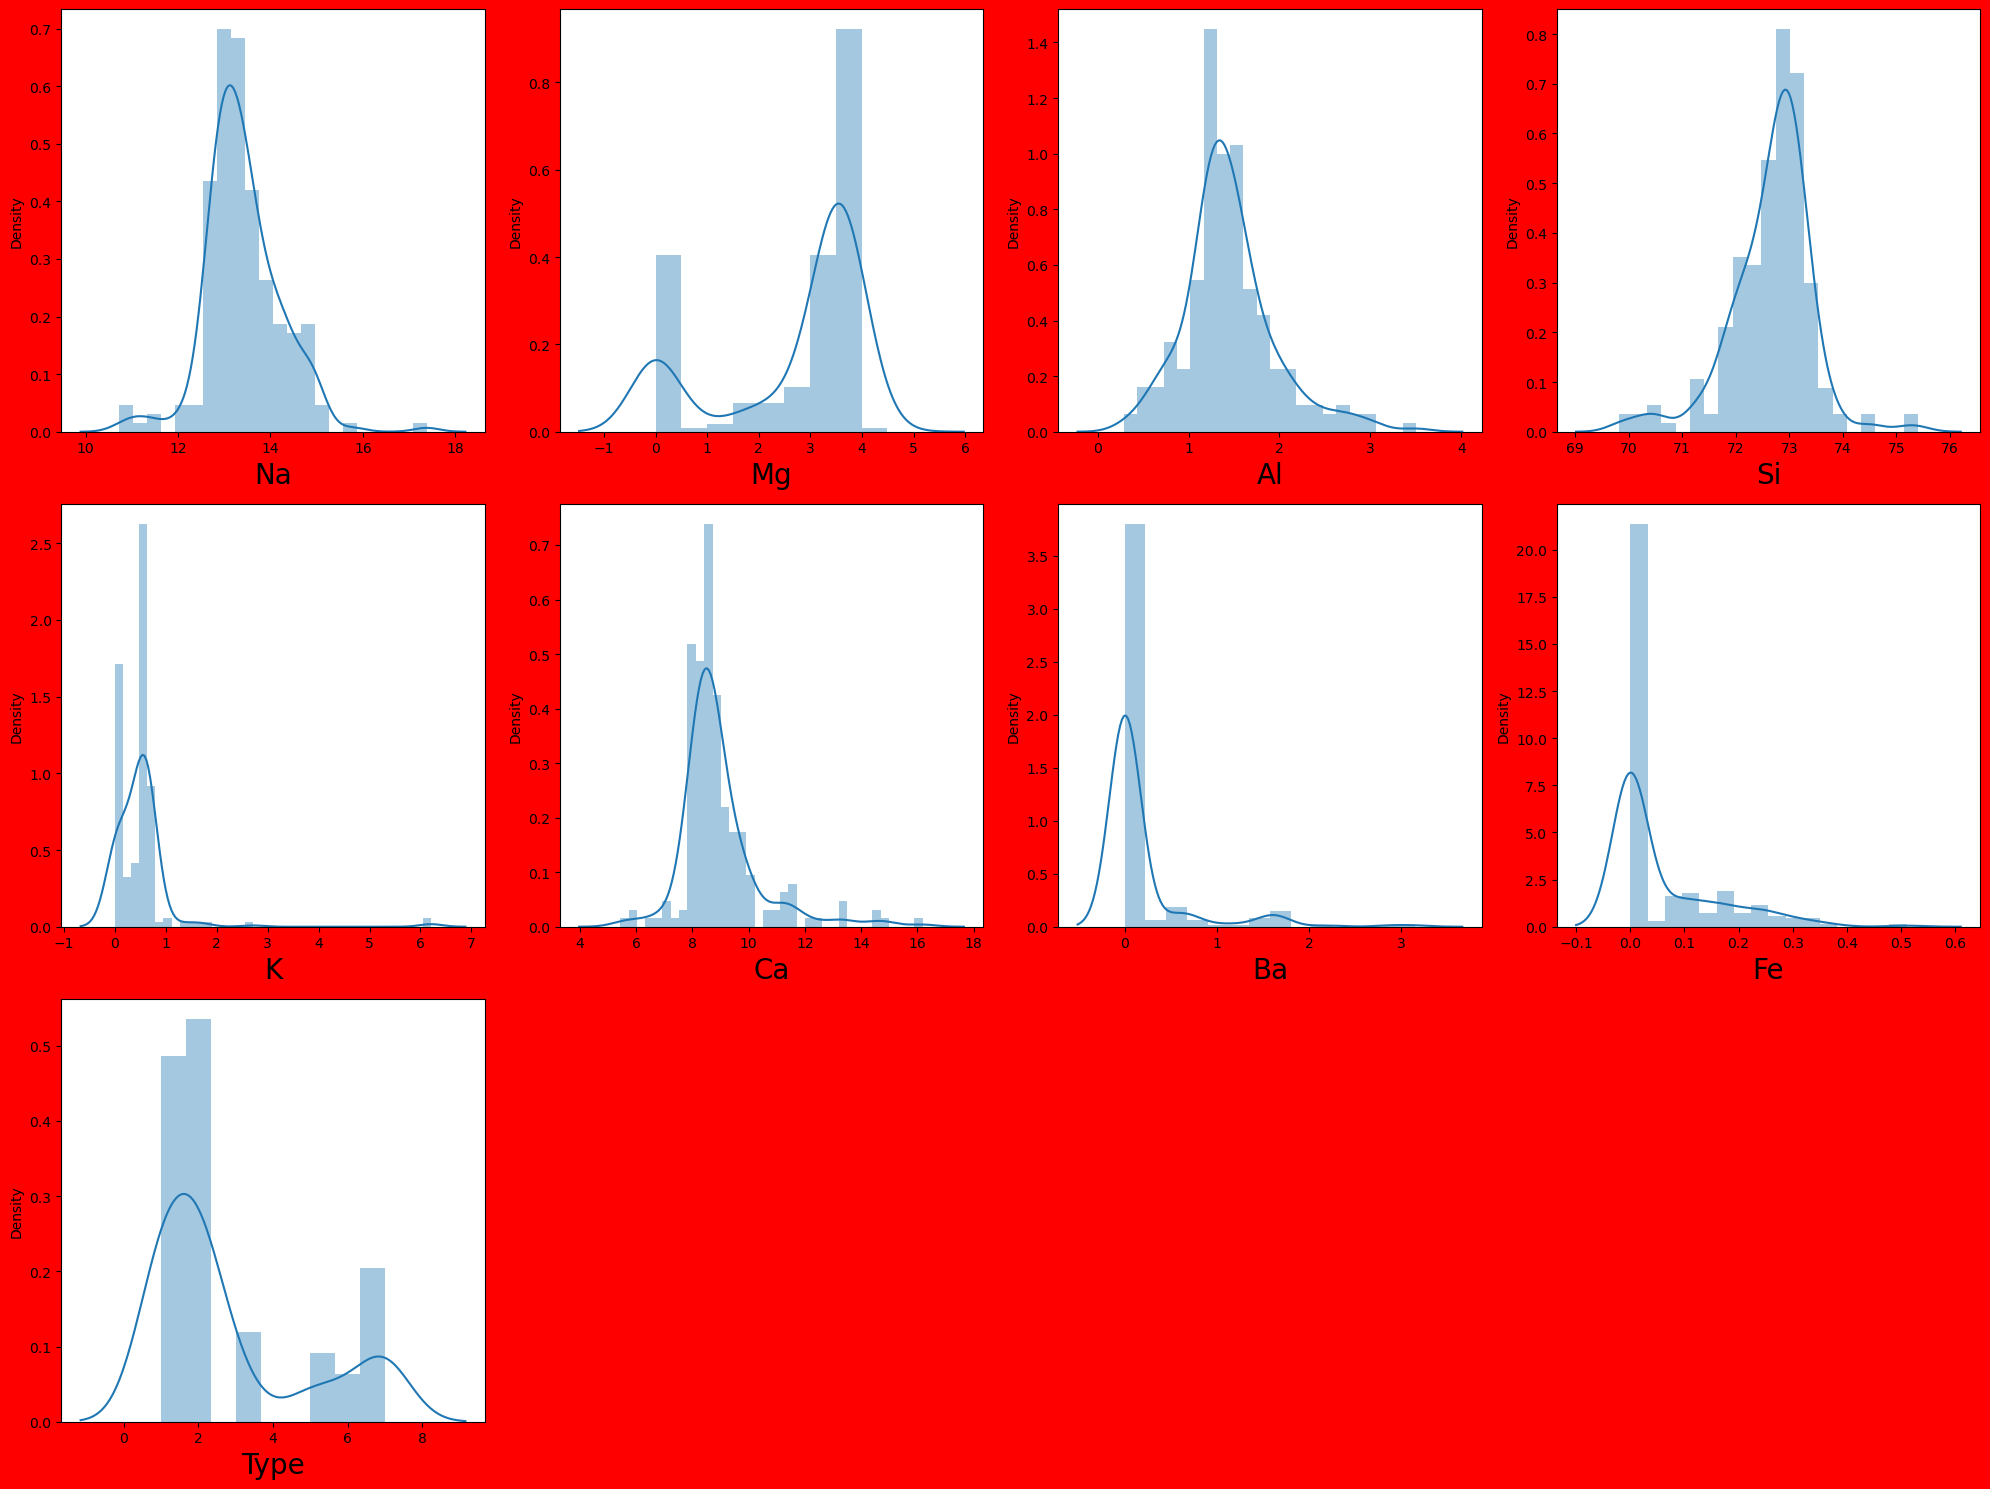

In [25]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=9:                    
        ax = plt.subplot(3,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [26]:
x.columns

Index(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [27]:
from scipy.stats import zscore

z_score = zscore(df[x.columns])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]

df.describe()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,193.00000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,13.41285,2.875130,1.427668,72.725544,0.433212,8.820777,0.123990,0.051865,2.626943
std,0.67260,1.310355,0.439568,0.582325,0.282063,0.990259,0.357943,0.085924,2.032471
min,11.03000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,12.94000,2.850000,1.190000,72.380000,0.140000,8.240000,0.000000,0.000000,1.000000
50%,13.30000,3.500000,1.360000,72.830000,0.560000,8.580000,0.000000,0.000000,2.000000
75%,13.78000,3.610000,1.610000,73.090000,0.600000,9.070000,0.000000,0.090000,3.000000
max,15.15000,4.490000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,7.000000


In [28]:
df.shape

(193, 9)

# 

## Removing Skewness

In [29]:
from scipy.stats import skew

Na: 0.3814893336957223


<Figure size 2000x1500 with 0 Axes>

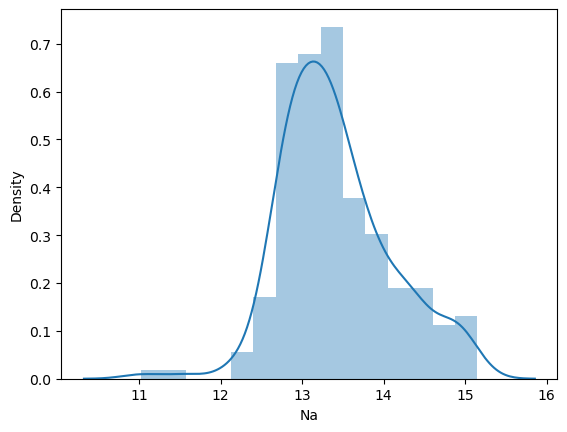

Mg: -1.5099542235185732


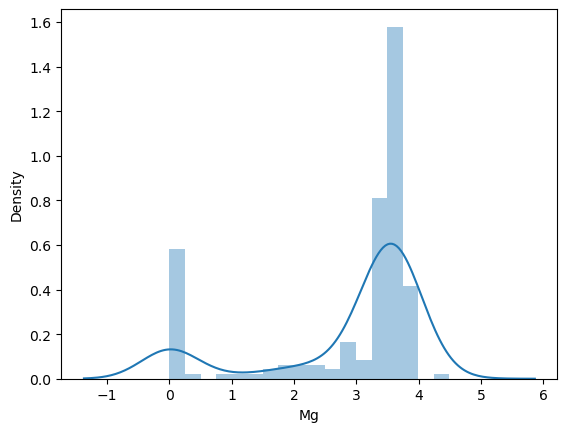

Al: 0.6950428504855704


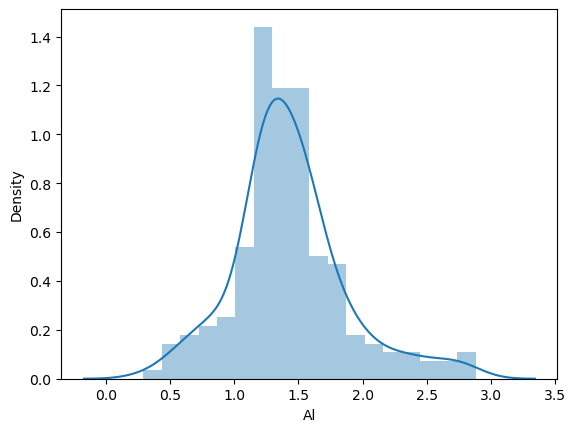

Si: -0.4326305816684029


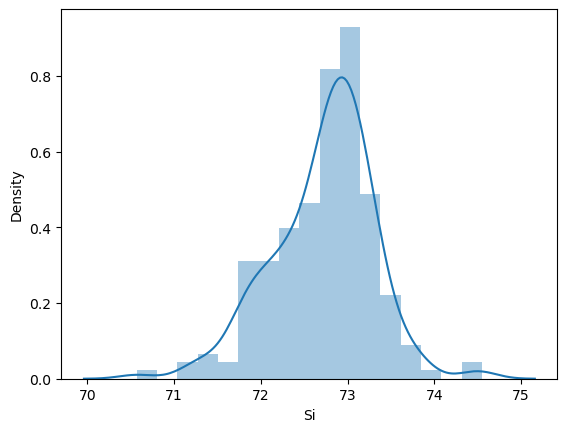

K: 0.2930864900131562


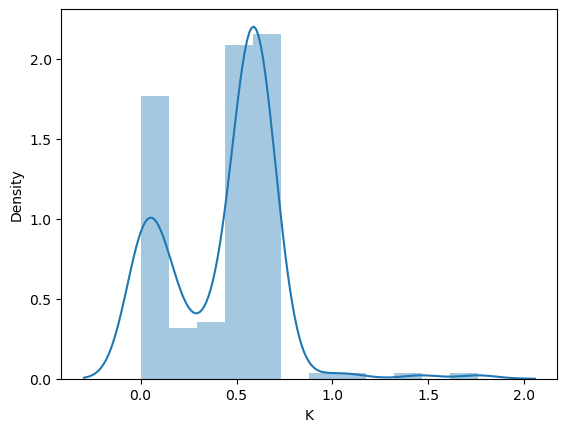

Ca: 1.0811030232334318


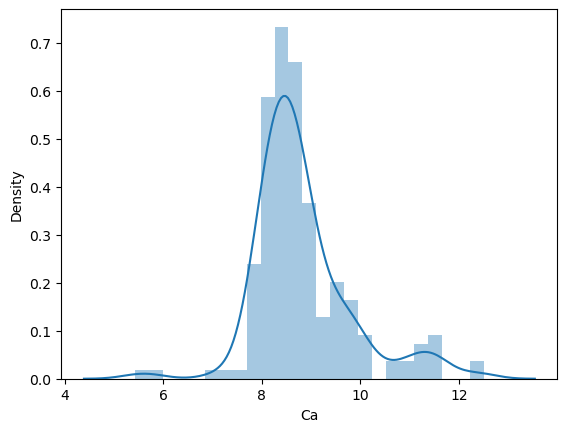

Ba: 3.1535013155379836


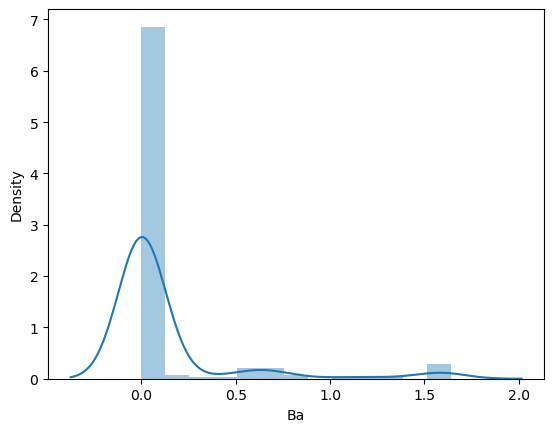

Fe: 1.4670942674258622


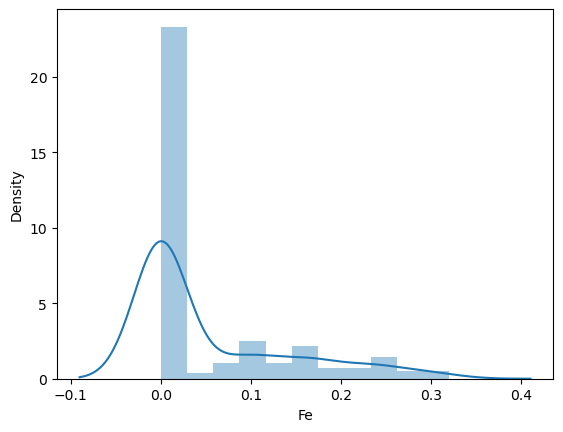

Type: 1.2673303579071227


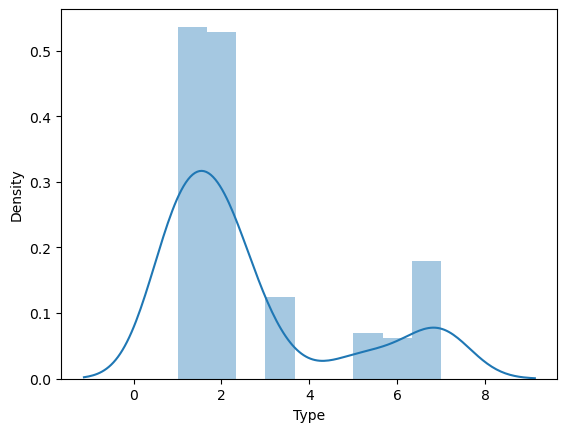

In [30]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df:
    print(f"\033[1m{column}: {skew(df[column])}\033[0m")
    
    plt.figure()
    sns.distplot(df[column])
    
    plt.show()

##### Mg, Al, Ca, Ba, Fe have high skewness, but Ba, Al & Mg are very strongly related to 'Type' column. So we can try to reduce skewss of Ca & Fe columns.

In [31]:
df.skew()

Na      0.384484
Mg     -1.521807
Al      0.700499
Si     -0.436027
K       0.295387
Ca      1.089590
Ba      3.178256
Fe      1.478611
Type    1.277279
dtype: float64

In [32]:
df['Ca'] = np.log(df['Ca'])
df['Ca'].skew()

0.34726275848499805

##### Replacing 0s in column 'Fe' with 0.0001 to facilitate dealing with skewness

In [33]:
Fe0 = df[df['Fe'] == 0]
Fe0.shape

(130, 9)

In [34]:
df['Fe'] = df['Fe'].replace(0, 0.0001)
df['Fe'].skew()

1.4792151206354396

In [35]:
df['Fe'] = np.log(df['Fe'])
df['Fe'].skew()

0.7755381791550094

# 

# 

## Oversampling

In [36]:
df["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [37]:
df["Type"].value_counts()

1    69
2    68
7    23
3    16
5     9
6     8
Name: Type, dtype: int64

In [38]:
x = df.drop(['Type'],axis=1)
y = df['Type'].values.reshape(-1, 1)

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
upsample = SMOTE()

In [41]:
x, y = upsample.fit_resample(x,y)

In [42]:
from collections import Counter
count = Counter(y)
print(count)

Counter({1: 69, 2: 69, 3: 69, 5: 69, 6: 69, 7: 69})


# 

## Importing important Metrices

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

## Standardization 

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### 

## Test - Train Split 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25)

In [48]:
x_train.shape

(310, 8)

In [49]:
x_test.shape

(104, 8)

### 

### 

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [51]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [52]:
cls_reg.coef_

array([[-0.69287871,  1.65696947, -1.51206051, -0.372862  ,  0.24381891,
         0.09347763,  0.17218931,  0.46553004],
       [ 0.13588056, -0.37138701, -0.07125638, -0.03386491,  0.87819451,
        -1.18552729, -0.39141815,  0.73292301],
       [-0.22260898,  0.89998523, -0.88732337, -0.73572571,  0.15992306,
        -0.25771371, -0.2329715 ,  0.37208419],
       [-1.21442531, -1.19647708,  0.79429087,  0.47982877,  0.63188026,
         1.61599249, -0.08313443, -0.31147342],
       [ 1.05424322, -0.11077239,  0.53028711,  0.48772513, -2.22412387,
         0.32340939, -1.3625618 , -1.0380041 ],
       [ 0.93978922, -0.87831821,  1.14606227,  0.17489871,  0.31030713,
        -0.58963852,  1.89789657, -0.22105973]])

In [53]:
cls_reg.intercept_

array([-0.23123115,  1.14194171,  0.58970244, -1.11865745, -0.62454907,
        0.24279352])

In [54]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.7903225806451613


In [55]:
y_pred = cls_reg.predict(x_test)
y_pred

array([1, 7, 3, 2, 7, 1, 1, 1, 1, 6, 2, 7, 6, 1, 1, 1, 7, 5, 3, 3, 5, 2,
       5, 6, 1, 2, 5, 6, 2, 3, 7, 5, 7, 5, 7, 2, 6, 2, 2, 2, 1, 7, 3, 1,
       6, 5, 6, 1, 3, 2, 6, 6, 5, 1, 5, 6, 1, 2, 1, 2, 2, 5, 5, 5, 5, 6,
       7, 3, 3, 3, 6, 3, 5, 6, 7, 1, 3, 1, 5, 6, 2, 1, 5, 5, 5, 6, 5, 3,
       2, 7, 2, 7, 6, 5, 1, 5, 7, 6, 7, 5, 1, 1, 2, 5], dtype=int64)

In [56]:
print('Accuracy Score:',cls_reg.score(x_test, y_test))

Accuracy Score: 0.7788461538461539


### Confusion Matrix

In [57]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[11,  4,  1,  0,  0,  0],
       [ 3, 10,  4,  0,  1,  0],
       [ 7,  2,  7,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  1,  0,  0,  0, 14]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

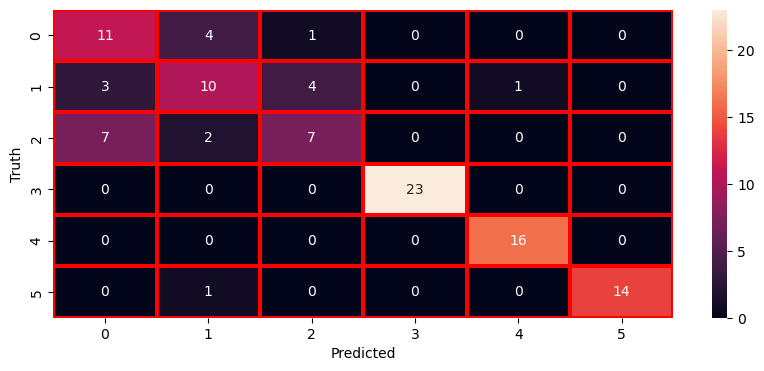

In [58]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.52      0.69      0.59        16
           2       0.59      0.56      0.57        18
           3       0.58      0.44      0.50        16
           5       1.00      1.00      1.00        23
           6       0.94      1.00      0.97        16
           7       1.00      0.93      0.97        15

    accuracy                           0.78       104
   macro avg       0.77      0.77      0.77       104
weighted avg       0.78      0.78      0.78       104



### Cross-validation

In [60]:
from sklearn.model_selection import KFold, cross_val_score

In [61]:
c1=cross_val_score (cls_reg, x_train, y_train, cv=5)
c1

array([0.77419355, 0.72580645, 0.79032258, 0.69354839, 0.77419355])

In [62]:
c1.mean()

0.7516129032258064

In [63]:
c2=cross_val_score(cls_reg, x_test, y_test, cv=5)
c2

array([0.66666667, 0.80952381, 0.61904762, 0.76190476, 0.8       ])

In [64]:
c2.mean()

0.7314285714285715

# 

## DecisionTreeClassifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [67]:
cls_dec = DecisionTreeClassifier(criterion='entropy',min_samples_leaf= 9, min_samples_split=2,max_depth=3, splitter='best')

In [68]:
cls_dec.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=9)

In [69]:
print('Accuracy Score:',cls_dec.score(x_train, y_train))

Accuracy Score: 0.8290322580645161


In [70]:
y_pred = cls_dec.predict(x_test)
y_pred

array([1, 7, 3, 2, 7, 1, 1, 3, 1, 6, 3, 7, 6, 1, 3, 1, 7, 5, 3, 3, 5, 1,
       5, 6, 3, 1, 5, 6, 1, 3, 2, 5, 7, 5, 7, 1, 6, 7, 1, 1, 1, 7, 3, 1,
       6, 5, 6, 1, 3, 1, 6, 6, 5, 1, 5, 6, 1, 2, 1, 5, 3, 5, 5, 5, 5, 6,
       7, 3, 3, 3, 6, 3, 5, 6, 7, 3, 3, 1, 5, 6, 2, 1, 5, 5, 5, 6, 5, 2,
       1, 7, 1, 7, 6, 5, 1, 5, 7, 6, 7, 5, 1, 1, 1, 5], dtype=int64)

In [71]:
print('Accuracy Score:',cls_dec.score(x_test, y_test))

Accuracy Score: 0.7788461538461539


### Confusion Matrix

In [72]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[13,  0,  3,  0,  0,  0],
       [ 9,  4,  3,  1,  1,  0],
       [ 5,  0, 11,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  1,  0,  0,  0, 14]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

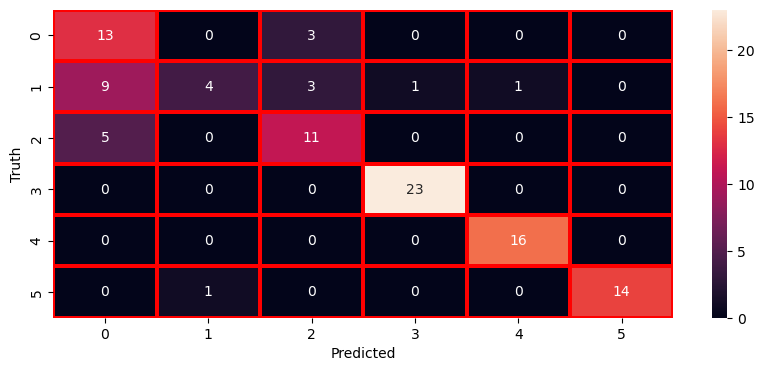

In [73]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.48      0.81      0.60        16
           2       0.80      0.22      0.35        18
           3       0.65      0.69      0.67        16
           5       0.96      1.00      0.98        23
           6       0.94      1.00      0.97        16
           7       1.00      0.93      0.97        15

    accuracy                           0.78       104
   macro avg       0.80      0.78      0.76       104
weighted avg       0.81      0.78      0.76       104



### Cross-validation

In [75]:
from sklearn.model_selection import KFold, cross_val_score

In [76]:
c3=cross_val_score (cls_dec, x_train, y_train, cv=5)
c3

array([0.79032258, 0.74193548, 0.77419355, 0.74193548, 0.87096774])

In [77]:
c3.mean()

0.7838709677419355

In [78]:
c4=cross_val_score(cls_dec, x_test, y_test, cv=5)
c4

array([0.76190476, 0.71428571, 0.61904762, 0.61904762, 0.75      ])

In [79]:
c4.mean()

0.6928571428571428

# 

## Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 50}

In [82]:
cls_rf = RandomForestClassifier(n_estimators=100,criterion='entropy', max_leaf_nodes=10, min_samples_split=3,max_depth=10)

In [83]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=10,
                       min_samples_split=3)

In [84]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.896774193548387


In [85]:
y_pred = cls_rf.predict(x_test)
y_pred

array([1, 7, 3, 2, 7, 1, 1, 3, 1, 6, 3, 7, 6, 1, 1, 1, 7, 5, 6, 3, 5, 1,
       5, 6, 1, 3, 5, 6, 1, 3, 7, 5, 7, 5, 7, 3, 6, 3, 2, 2, 1, 7, 1, 1,
       6, 5, 6, 1, 3, 2, 6, 6, 5, 1, 5, 6, 1, 2, 1, 5, 3, 5, 5, 5, 5, 6,
       7, 3, 1, 1, 6, 1, 5, 6, 7, 3, 3, 1, 5, 6, 2, 1, 5, 5, 5, 6, 5, 2,
       3, 7, 2, 7, 6, 5, 1, 5, 7, 6, 7, 5, 1, 1, 2, 5], dtype=int64)

In [86]:
print('Accuracy Score:',cls_rf.score(x_test, y_test))

Accuracy Score: 0.7788461538461539


### Confusion Matrix

In [87]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[12,  1,  3,  0,  0,  0],
       [ 6,  8,  2,  1,  1,  0],
       [ 7,  0,  8,  0,  1,  0],
       [ 0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  0,  1,  0,  0, 14]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

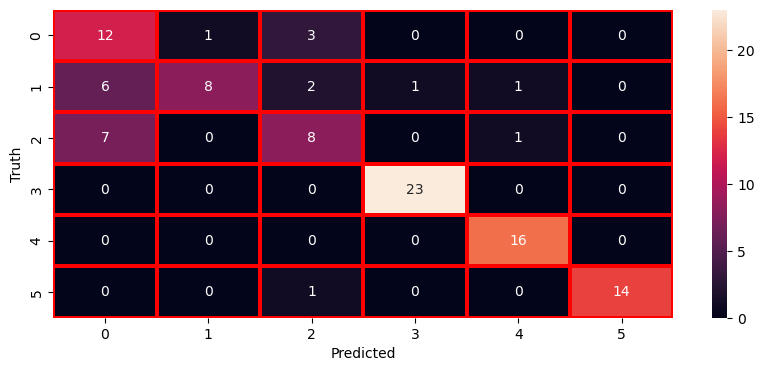

In [88]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.48      0.75      0.59        16
           2       0.89      0.44      0.59        18
           3       0.57      0.50      0.53        16
           5       0.96      1.00      0.98        23
           6       0.89      1.00      0.94        16
           7       1.00      0.93      0.97        15

    accuracy                           0.78       104
   macro avg       0.80      0.77      0.77       104
weighted avg       0.81      0.78      0.78       104



### Cross-validation

In [90]:
from sklearn.model_selection import KFold, cross_val_score

In [91]:
c5=cross_val_score(cls_rf, x_train, y_train, cv=5)
c5

array([0.82258065, 0.82258065, 0.82258065, 0.79032258, 0.88709677])

In [92]:
c5.mean()

0.829032258064516

In [93]:
c6=cross_val_score(cls_rf, x_test, y_test, cv=5)
c6

array([0.76190476, 0.66666667, 0.71428571, 0.76190476, 0.85      ])

In [94]:
c6.mean()

0.7509523809523809

# 

## KNeighbors Classifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
cls_KN = KNeighborsClassifier(n_neighbors=2, leaf_size=2, p = 5, algorithm='brute', weights = 'distance')

In [97]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=2, n_neighbors=2, p=5,
                     weights='distance')

In [98]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 1.0


In [99]:
y_pred = cls_KN.predict(x_test)
y_pred

array([2, 7, 3, 1, 7, 1, 1, 1, 2, 6, 3, 7, 6, 1, 3, 1, 7, 5, 1, 1, 5, 2,
       5, 6, 1, 2, 5, 6, 1, 3, 7, 5, 7, 5, 7, 3, 6, 7, 1, 1, 1, 7, 2, 3,
       6, 5, 6, 2, 3, 1, 6, 6, 5, 1, 5, 6, 1, 2, 3, 2, 2, 5, 5, 5, 5, 6,
       7, 3, 3, 1, 6, 1, 5, 6, 7, 3, 3, 3, 5, 6, 2, 1, 5, 5, 5, 6, 5, 3,
       3, 7, 1, 7, 6, 5, 1, 5, 7, 6, 7, 5, 1, 2, 2, 5], dtype=int64)

In [100]:
print('Accuracy Score:',cls_KN.score(x_test, y_test))

Accuracy Score: 0.8365384615384616


### Confusion Matrix

In [101]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[13,  2,  1,  0,  0,  0],
       [ 7,  8,  2,  0,  1,  0],
       [ 2,  2, 12,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0, 15]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

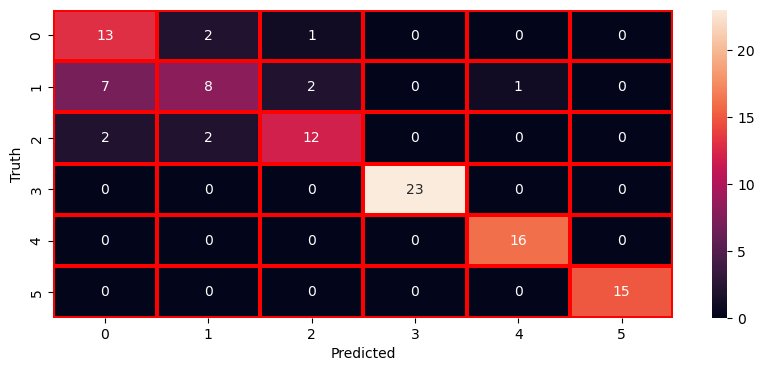

In [102]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.59      0.81      0.68        16
           2       0.67      0.44      0.53        18
           3       0.80      0.75      0.77        16
           5       1.00      1.00      1.00        23
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        15

    accuracy                           0.84       104
   macro avg       0.83      0.83      0.83       104
weighted avg       0.84      0.84      0.83       104



### Cross-validation

In [104]:
from sklearn.model_selection import KFold, cross_val_score

In [105]:
c7=cross_val_score(cls_KN, x_train, y_train, cv=5)
c7

array([0.87096774, 0.85483871, 0.87096774, 0.80645161, 0.88709677])

In [106]:
c7.mean()

0.8580645161290322

In [107]:
c8=cross_val_score(cls_KN, x_test, y_test, cv=5)
c8

array([0.76190476, 0.61904762, 0.76190476, 0.71428571, 0.85      ])

In [108]:
c8.mean()

0.7414285714285714

# 

## Support Vector Classifier

In [109]:
from sklearn.svm import SVC

In [110]:
cls_SVC = SVC(kernel='rbf',C=5, gamma=2,shrinking=True,tol=1e-3,class_weight=None)

In [111]:
cls_SVC.fit(x_train, y_train)

SVC(C=5, gamma=2)

In [112]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 0.9806451612903225


In [113]:
y_pred = cls_SVC.predict(x_test)
y_pred

array([2, 7, 3, 2, 2, 1, 1, 3, 2, 2, 3, 7, 6, 1, 3, 3, 7, 5, 1, 1, 5, 2,
       5, 6, 1, 2, 2, 6, 1, 3, 2, 5, 7, 5, 7, 3, 6, 7, 1, 1, 1, 7, 2, 3,
       6, 5, 6, 2, 3, 2, 6, 6, 5, 3, 5, 6, 1, 2, 3, 2, 1, 5, 5, 5, 2, 6,
       7, 3, 1, 2, 6, 2, 5, 6, 7, 3, 3, 1, 5, 6, 2, 1, 5, 5, 5, 6, 5, 2,
       3, 7, 1, 7, 6, 5, 1, 5, 7, 6, 7, 5, 1, 1, 2, 5], dtype=int64)

In [114]:
print('Accuracy Score:',cls_SVC.score(x_test, y_test))

Accuracy Score: 0.8173076923076923


### Confusion Matrix

In [115]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[11,  3,  2,  0,  0,  0],
       [ 3, 13,  2,  0,  0,  0],
       [ 5,  0, 11,  0,  0,  0],
       [ 0,  2,  0, 21,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  2,  0,  0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

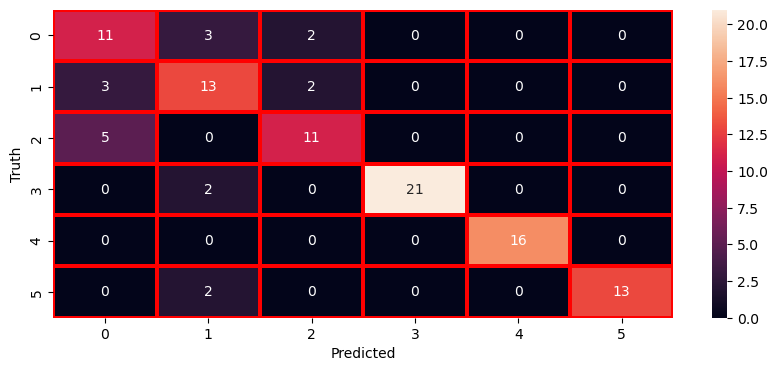

In [116]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.58      0.69      0.63        16
           2       0.65      0.72      0.68        18
           3       0.73      0.69      0.71        16
           5       1.00      0.91      0.95        23
           6       1.00      1.00      1.00        16
           7       1.00      0.87      0.93        15

    accuracy                           0.82       104
   macro avg       0.83      0.81      0.82       104
weighted avg       0.83      0.82      0.82       104



### Cross-validation

In [118]:
from sklearn.model_selection import KFold, cross_val_score

In [119]:
c9=cross_val_score(cls_SVC, x_train, y_train, cv=5)
c9

array([0.85483871, 0.80645161, 0.83870968, 0.80645161, 0.90322581])

In [120]:
c9.mean()

0.8419354838709678

In [121]:
c10=cross_val_score(cls_SVC, x_test, y_test, cv=5)
c10

array([0.66666667, 0.47619048, 0.71428571, 0.85714286, 0.8       ])

In [122]:
c10.mean()

0.7028571428571428

# 

## Gradient Boosting Classifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [124]:
cls_gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=90, min_samples_split = 2, min_samples_leaf = 8, max_depth = 5, max_features = None)

In [125]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=8,
                           n_estimators=90)

In [126]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.9451612903225807


In [127]:
y_pred = cls_gb.predict(x_test)
y_pred

array([1, 7, 3, 2, 7, 2, 1, 3, 1, 6, 3, 7, 6, 1, 1, 1, 7, 5, 1, 1, 5, 1,
       5, 6, 1, 2, 2, 6, 1, 3, 7, 5, 7, 5, 7, 3, 6, 7, 2, 2, 1, 7, 1, 3,
       6, 5, 6, 1, 3, 3, 6, 6, 5, 1, 5, 6, 1, 2, 1, 2, 1, 5, 5, 2, 5, 6,
       7, 3, 1, 1, 6, 1, 5, 6, 7, 3, 3, 3, 5, 6, 2, 1, 5, 5, 5, 6, 5, 2,
       3, 7, 2, 7, 6, 5, 1, 5, 7, 6, 7, 5, 1, 1, 2, 5], dtype=int64)

In [128]:
print('Accuracy Score:',cls_gb.score(x_test, y_test))

Accuracy Score: 0.7980769230769231


### Confusion Matrix

In [129]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[12,  1,  3,  0,  0,  0],
       [ 6, 10,  1,  0,  1,  0],
       [ 7,  0,  9,  0,  0,  0],
       [ 0,  2,  0, 21,  0,  0],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0, 15]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

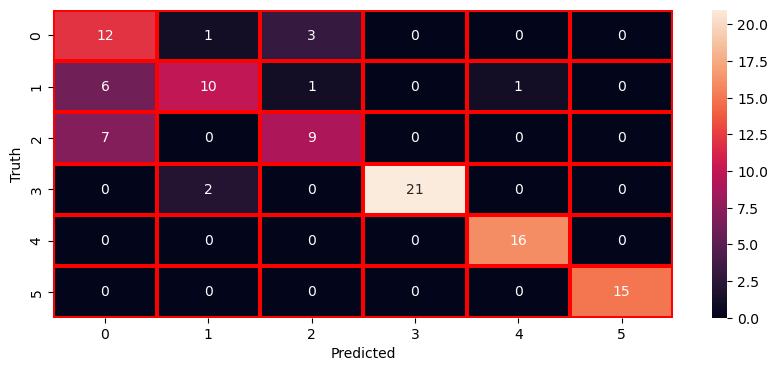

In [130]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.48      0.75      0.59        16
           2       0.77      0.56      0.65        18
           3       0.69      0.56      0.62        16
           5       1.00      0.91      0.95        23
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        15

    accuracy                           0.80       104
   macro avg       0.81      0.80      0.80       104
weighted avg       0.82      0.80      0.80       104



### Cross-validation

In [132]:
from sklearn.model_selection import KFold, cross_val_score

In [133]:
c11=cross_val_score(cls_gb, x_train, y_train, cv=5)
c11

array([0.80645161, 0.85483871, 0.79032258, 0.80645161, 0.87096774])

In [134]:
c11.mean()

0.8258064516129032

In [135]:
c12=cross_val_score(cls_gb, x_test, y_test, cv=5)
c12

array([0.76190476, 0.61904762, 0.80952381, 0.71428571, 0.8       ])

In [136]:
c12.mean()

0.740952380952381

# 

## GaussianNB

In [137]:
from sklearn.naive_bayes import GaussianNB

In [138]:
gnb = GaussianNB(var_smoothing=1e-3)

In [139]:
gnb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.001)

In [140]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.8032258064516129


In [141]:
y_pred = gnb.predict(x_test)

In [142]:
print('Accuracy Score:',gnb.score(x_test, y_test))

Accuracy Score: 0.7307692307692307


### Confusion Matrix

In [143]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 4,  7,  5,  0,  0,  0],
       [ 5, 10,  2,  0,  1,  0],
       [ 3,  1, 11,  0,  1,  0],
       [ 0,  0,  0, 21,  0,  2],
       [ 0,  0,  0,  0, 16,  0],
       [ 0,  1,  0,  0,  0, 14]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

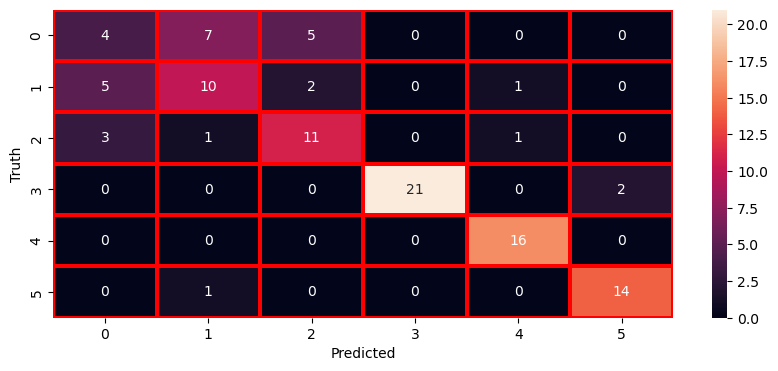

In [144]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.33      0.25      0.29        16
           2       0.53      0.56      0.54        18
           3       0.61      0.69      0.65        16
           5       1.00      0.91      0.95        23
           6       0.89      1.00      0.94        16
           7       0.88      0.93      0.90        15

    accuracy                           0.73       104
   macro avg       0.71      0.72      0.71       104
weighted avg       0.72      0.73      0.72       104



### Cross-validation

In [146]:
from sklearn.model_selection import KFold, cross_val_score

In [147]:
c13=cross_val_score(gnb, x_train, y_train, cv=5)
c13

array([0.80645161, 0.79032258, 0.82258065, 0.70967742, 0.82258065])

In [148]:
c13.mean()

0.7903225806451613

In [149]:
c14=cross_val_score(gnb, x_test, y_test, cv=5)
c14

array([0.71428571, 0.66666667, 0.61904762, 0.80952381, 0.65      ])

In [150]:
c14.mean()

0.6919047619047618

# 

# 

## Saving the Top 3 Best Models

In [151]:
import pickle 

In [152]:
with open('cls_rf', 'wb') as f: 
    pickle.dump(cls_rf, f)

In [153]:
with open('cls_gb', 'wb') as f: 
    pickle.dump(cls_gb, f)

In [154]:
with open('cls_KN', 'wb') as f: 
    pickle.dump(cls_KN, f)

# 

## Opening the Saved Models

In [155]:
with open('cls_rf', 'rb') as f:
    l1 = pickle.load(f)

In [156]:
with open('cls_gb', 'rb') as f:
    l2 = pickle.load(f)

In [157]:
with open('cls_KN', 'rb') as f:
    l3 = pickle.load(f)

# 

## Predicting using Saved models

In [158]:
l1.predict(scaler.transform([[13.64, 4.49, 1.10, 71.78, 0.06, 2.169054, 0.0, -9.21034]]))

array([1], dtype=int64)

In [159]:
l2.predict(scaler.transform([[13.64, 4.49, 1.10, 71.78, 0.06, 2.169054, 0.0, -9.21034]]))

array([1], dtype=int64)

In [160]:
l3.predict(scaler.transform([[13.64, 4.49, 1.10, 71.78, 0.06, 2.169054, 0.0, -9.21034]]))

array([1], dtype=int64)

# 

# 